## Machine Learning helps me in my Venue hopping Tour Venture

#### Table of Contents:

1.	Introductory section 
Problem Description
2.	Methodology section 
Data and Research and Approach
3.	Exploratory Data Analysis
4.	Discussion section
5.	Results and Conclusion section
6.	References
7.	Acknowledgment



### 1.	Introduction: Problem Description.

New York City comprises 5 boroughs sitting where the Hudson River meets the Atlantic Ocean. It is one of world’s top tourist spots due to its diversity in Arts, Architecture, Shopping and Dining.

New York City received an eighth consecutive annual record of approximately 62.8 million tourists in 2017, counting not just overnighters but anyone visiting for the day from over 50 miles away, including commuters. Overall the city welcomed 38 million visitors who stayed overnight of which 13.3 million were international in 2018

And the expenditure by these tourists have been mostly in Departmental stores and also restaurants. 
Now imagine you are one of those tourists and you want to spend your time in NYC wisely. With size of NYC and so many choices available and gems of them hidden around and you want to cover the best of everything, how would you do it. How can you optimize your day so that you can experience the best of everything?
Here I offer you an optimized tour so you can spend your time wisely and get the best experience of whole of NYC in least amount of time.
Well at least let me start small and give you best of Eating, departmental shop and electronics experience across NYC in smallest possible time and allow you to select the section of NYC as a choice.


#### Stakeholders:
•	I, as the owner of Travel related online business.
•	Tourists who have come to get relief from daily stress.
Questions I need answer for so as to provide the above experience.
•	How can divide the NYC into sections so as to get the location data for each of these sections?
•	Where can I find the trusted data source for the best rated and liked Eating, Departmental and electronics shop location in NYC.
•	How can I optimize the time taken to visit each of the top venue categories in each section of NYC?
•	Which section should I visit first or should be the only section to visit?


#### Data
For this project we need the following data:
•	New York City data that contains list Boroughs, Neighborhoods along with their latitude and longitude.
Data source: https://geo.nyu.edu/catalog/nyu_2451_34572
Description: This data set contains the required information. And we will use this data set to explore various neighborhoods of New York city.
•	Venues in each neighborhood of New York city with category, ratings and likes.
Data source: Fousquare API
From the categories available,
https://developer.foursquare.com/docs/resources/categories
I will looking for Food, Electronics Store and Department Store only.
To get Listing of venues in NYC
https://developer.foursquare.com/docs/api/venues/search

To get ratings and likes for the venues.
https://developer.foursquare.com/docs/api/venues/details

Description: By using this api we will get all the venues in each neighborhood. To keep things simple, if there is a tie, I will pick up one randomly.
•	GeoSpace data
Data source: https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
Or Use geopy library to get the latitude and longitude values of New York City

address = 'New York City, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

Description: By using this geo space data we will get the New York Borough boundaries that will help us visualize choropleth map.

•	Route Time Travel Data

Data source: https://docs.microsoft.com/en-us/bingmaps/rest-services/routes/calculate-a-route
Or https://github.com/Project-OSRM/osrm-backend/blob/master/docs/http.md#responses

Description: A waypoint is a specified geographical location defined by longitude and latitude that is used for navigational purposes. The route includes information such as route instructions, travel duration, travel distance or transit information.


## Exploratory Data Analysis

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


In [2]:
!conda install -c conda-forge geopy --yes 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\gpsingh07331\Anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.7.5                |           py37_0         3.0 MB  conda-forge
    conda-package-handling-1.3.10|           py37_0         277 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  conda-package-han~ conda-forge/win-64::conda-package-handling-1.3.10-py37_0

The following packages will be UPDATED:

  conda                                       4.6.14-py37_0 --> 4.7.5-py37_0




conda-4.7.5          | 3.0 MB    |            |   0% 
conda-4.7.5          | 3.0 MB    |            |   1% 
conda-4.7.5          | 3.0 MB    | 5          |   5% 


In [3]:
from geopy.geocoders import Nominatim

####Download and Explore Dataset

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 

In [4]:
import urllib.request, json 
with urllib.request.urlopen("https://cocl.us/new_york_dataset/newyork_data.json") as url:
    newyork_data = json.loads(url.read().decode())
    print(newyork_data)

{'type': 'FeatureCollection', 'totalFeatures': 306, 'features': [{'type': 'Feature', 'id': 'nyu_2451_34572.1', 'geometry': {'type': 'Point', 'coordinates': [-73.84720052054902, 40.89470517661]}, 'geometry_name': 'geom', 'properties': {'name': 'Wakefield', 'stacked': 1, 'annoline1': 'Wakefield', 'annoline2': None, 'annoline3': None, 'annoangle': 0.0, 'borough': 'Bronx', 'bbox': [-73.84720052054902, 40.89470517661, -73.84720052054902, 40.89470517661]}}, {'type': 'Feature', 'id': 'nyu_2451_34572.2', 'geometry': {'type': 'Point', 'coordinates': [-73.82993910812398, 40.87429419303012]}, 'geometry_name': 'geom', 'properties': {'name': 'Co-op City', 'stacked': 2, 'annoline1': 'Co-op', 'annoline2': 'City', 'annoline3': None, 'annoangle': 0.0, 'borough': 'Bronx', 'bbox': [-73.82993910812398, 40.87429419303012, -73.82993910812398, 40.87429419303012]}}, {'type': 'Feature', 'id': 'nyu_2451_34572.3', 'geometry': {'type': 'Point', 'coordinates': [-73.82780644716412, 40.887555677350775]}, 'geometry_n

In [5]:
newyork_data.keys()

dict_keys(['type', 'totalFeatures', 'features', 'crs', 'bbox'])

In [6]:
newyork_data['features']

[{'type': 'Feature',
  'id': 'nyu_2451_34572.1',
  'geometry': {'type': 'Point',
   'coordinates': [-73.84720052054902, 40.89470517661]},
  'geometry_name': 'geom',
  'properties': {'name': 'Wakefield',
   'stacked': 1,
   'annoline1': 'Wakefield',
   'annoline2': None,
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.84720052054902,
    40.89470517661,
    -73.84720052054902,
    40.89470517661]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.2',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82993910812398, 40.87429419303012]},
  'geometry_name': 'geom',
  'properties': {'name': 'Co-op City',
   'stacked': 2,
   'annoline1': 'Co-op',
   'annoline2': 'City',
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.82993910812398,
    40.87429419303012,
    -73.82993910812398,
    40.87429419303012]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.3',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82780644716412, 

In [7]:
neighborhoods_data = newyork_data['features']

In [8]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [9]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [10]:
neighborhoods_data

[{'type': 'Feature',
  'id': 'nyu_2451_34572.1',
  'geometry': {'type': 'Point',
   'coordinates': [-73.84720052054902, 40.89470517661]},
  'geometry_name': 'geom',
  'properties': {'name': 'Wakefield',
   'stacked': 1,
   'annoline1': 'Wakefield',
   'annoline2': None,
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.84720052054902,
    40.89470517661,
    -73.84720052054902,
    40.89470517661]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.2',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82993910812398, 40.87429419303012]},
  'geometry_name': 'geom',
  'properties': {'name': 'Co-op City',
   'stacked': 2,
   'annoline1': 'Co-op',
   'annoline2': 'City',
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.82993910812398,
    40.87429419303012,
    -73.82993910812398,
    40.87429419303012]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.3',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82780644716412, 

In [11]:
neighborhoods_data[0]['properties']['borough']

'Bronx'

In [12]:
for data in neighborhoods_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [13]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [55]:
neighborhoods.tail()


,Borough,Neighborhood,Latitude,Longitude
301,Manhattan,Hudson Yards,40.756658,-74.000111
302,Queens,Hammels,40.587338,-73.805530
303,Queens,Bayswater,40.611322,-73.765968
304,Queens,Queensbridge,40.756091,-73.945631
305,Staten Island,Fox Hills,40.617311,-74.081740


In [14]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


Text(0, 0.5, 'Neighborhood Count')

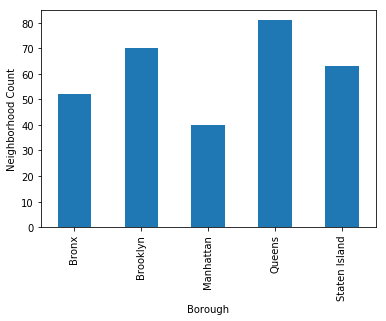

In [35]:
import seaborn as sns
# Distribution of neighborhoods in NYC Boroughs
ngp=neighborhoods.groupby('Borough')['Neighborhood'].count()
rep_plot = ngp.plot(kind='bar')
rep_plot.set_xlabel("Borough")
rep_plot.set_ylabel("Neighborhood Count")


In [48]:
#Check for any missing data
neighborhoods.isnull().any()

Borough         False
Neighborhood    False
Latitude        False
Longitude       False
dtype: bool

In [54]:
neighborhoods.shape
neighborhoods.describe(include='all')

,Borough,Neighborhood,Latitude,Longitude
count,306,306,306.000000,306.000000
unique,5,302,NaN,NaN
top,Queens,Murray Hill,NaN,NaN
freq,81,2,NaN,NaN
mean,NaN,NaN,40.701362,-73.946254
std,NaN,NaN,0.097498,0.121202
min,NaN,NaN,40.505334,-74.246569
25%,NaN,NaN,40.617778,-74.000062
50%,NaN,NaN,40.702969,-73.932009
75%,NaN,NaN,40.766645,-73.857525


In [36]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [37]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [38]:
#Foursquare API Call
CLIENT_ID = '5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX' # your Foursquare ID
CLIENT_SECRET = 'VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 200
radius=500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX
CLIENT_SECRET:VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX


In [39]:
categoryId="4bf58dd8d48988d122951735,4bf58dd8d48988d1f6941735,4bf58dd8d48988d10f941735"
# Food, Electronic, Department

In [40]:
# Get data using Foursquare API for our required categories
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}&radius={}&categoryId={}'.format(
CLIENT_ID, 
CLIENT_SECRET, 
VERSION, 
latitude, 
longitude, 
LIMIT,
radius,
categoryId)

results = requests.get(url).json()

In [41]:
results

{'meta': {'code': 200, 'requestId': '5d12bc22d29cbb00237bc81f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Downtown Manhattan',
  'headerFullLocation': 'Downtown Manhattan, New York',
  'headerLocationGranularity': 'neighborhood',
  'query': 'electronics',
  'totalResults': 34,
  'suggestedBounds': {'ne': {'lat': 40.7172281045, 'lng': -74.00008952063419},
   'sw': {'lat': 40.7082280955, 'lng': -74.0119408793658}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '575dea4c498e2739e43a27e2',
       'name': 'Aahar Indian Cuisine',
       'location': {'address': '10 Murray St',
        'crossStreet': 'Broadway',
        'lat': 40.71330656515891,
        'lng': -74.00799405698501,
 

In [56]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [57]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Aahar Indian Cuisine,Indian Restaurant,40.713307,-74.007994
1,Apple World Trade Center,Electronics Store,40.711915,-74.011503
2,Benares,Indian Restaurant,40.714117,-74.009248
3,The Kati Roll Company,Indian Restaurant,40.709114,-74.009091
4,Tandoor Palace,Indian Restaurant,40.709316,-74.005783


In [58]:
nearby_venues

,name,categories,lat,lng
0,Aahar Indian Cuisine,Indian Restaurant,40.713307,-74.007994
1,Apple World Trade Center,Electronics Store,40.711915,-74.011503
2,Benares,Indian Restaurant,40.714117,-74.009248
3,The Kati Roll Company,Indian Restaurant,40.709114,-74.009091
4,Tandoor Palace,Indian Restaurant,40.709316,-74.005783
5,Century 21 Department Store,Department Store,40.710625,-74.011019
6,C21·EDITION,Department Store,40.710802,-74.010965
7,AT&T,Electronics Store,40.711802,-74.008559
8,T-Mobile,Electronics Store,40.712501,-74.007998
9,T-Mobile,Electronics Store,40.709846,-74.008605


In [45]:
def getNearbyVenues(Borough,names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for Borough,name, lat, lng in zip(Borough,names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
        categoryId)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            Borough,
            name, 
            lat, 
            lng, 
            v['venue']['categories'][0]['id'],
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough','Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                             'Category ID id',
                  'Venue', 
                             'Venue Id',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [46]:
nyc_venues = getNearbyVenues(Borough=neighborhoods['Borough'],names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )


In [59]:
nyc_venues.head(10)

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Category ID id,Venue,Venue Id,Venue Latitude,Venue Longitude,Venue Category
0,Bronx,Co-op City,40.874294,-73.829939,4bf58dd8d48988d1f6941735,Spirit NYC,5071e566e4b0db7c167d23d8,40.870127,-73.828651,Department Store
1,Bronx,Eastchester,40.887556,-73.827806,4bf58dd8d48988d122951735,Dyre Wireless Mall,4e6d157db993061ea9221c3f,40.887356,-73.831422,Electronics Store
2,Bronx,Fieldston,40.895437,-73.905643,4bf58dd8d48988d1b3941735,Medical Billing Practice Management,594af13703132007e85cd97b,40.892940,-73.900870,Medical School
3,Bronx,Kingsbridge,40.881687,-73.902818,4bf58dd8d48988d122951735,T-Mobile,575357a8498ed2ddeae37ce2,40.878711,-73.905239,Electronics Store
4,Bronx,Kingsbridge,40.881687,-73.902818,4bf58dd8d48988d122951735,Broadway Wireless & Electronics,4fa96793e4b0f6de2cfe2ff8,40.880761,-73.903364,Electronics Store
5,Bronx,Kingsbridge,40.881687,-73.902818,4bf58dd8d48988d10f941735,Tazmohol Indian Restaurant,4e4ddf74bd4101d0d79d3e42,40.879331,-73.903192,Indian Restaurant
6,Bronx,Kingsbridge,40.881687,-73.902818,52f2ab2ebcbc57f1066b8b28,Staples® Print & Marketing Services,4b5359b2f964a520a69827e3,40.881011,-73.902334,Print Shop
7,Bronx,Kingsbridge,40.881687,-73.902818,4bf58dd8d48988d122951735,1800Fix.com,521281f511d2a211211680f0,40.879017,-73.904137,Electronics Store
8,Bronx,Kingsbridge,40.881687,-73.902818,4bf58dd8d48988d122951735,Verizon Wireless - Riverdale,4e8b4f3dd5fb009e60f98c69,40.879581,-73.905480,Electronics Store
9,Bronx,Kingsbridge,40.881687,-73.902818,4bf58dd8d48988d1f6941735,Allison's Brand Names For Less,4fe50136e4b08674c9d8fca0,40.878298,-73.904978,Department Store


In [60]:
# We only want data for our categories
nyc_venues_cat=nyc_venues.loc[nyc_venues['Venue Category'].isin(['Department Store','Electronics Store','Indian Restaurant'])]


In [61]:
nyc_venues_cat.groupby(['Borough','Venue Category']).size()

Borough        Venue Category   
Bronx          Department Store      24
               Electronics Store    114
               Indian Restaurant     11
Brooklyn       Department Store      38
               Electronics Store    212
               Indian Restaurant     55
Manhattan      Department Store      91
               Electronics Store    447
               Indian Restaurant    209
Queens         Department Store      24
               Electronics Store    137
               Indian Restaurant     59
Staten Island  Department Store       4
               Electronics Store     34
               Indian Restaurant      5
dtype: int64

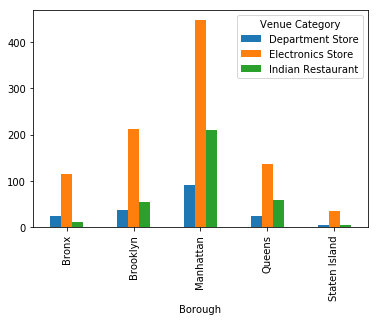

In [66]:
# Distribution of interested venues in NYC Boroughs
nyc_venues_cat.groupby(['Borough','Venue Category']).size().unstack().plot(kind='bar')


In [67]:
nyc_venues_cat.isnull().any()

Borough                   False
Neighborhood              False
Neighborhood Latitude     False
Neighborhood Longitude    False
Category ID id            False
Venue                     False
Venue Id                  False
Venue Latitude            False
Venue Longitude           False
Venue Category            False
dtype: bool

In [68]:
nyc_venues_cat.dtypes

Borough                    object
Neighborhood               object
Neighborhood Latitude     float64
Neighborhood Longitude    float64
Category ID id             object
Venue                      object
Venue Id                   object
Venue Latitude            float64
Venue Longitude           float64
Venue Category             object
dtype: object

In [69]:
nyc_venues.isnull().any()

Borough                   False
Neighborhood              False
Neighborhood Latitude     False
Neighborhood Longitude    False
Category ID id            False
Venue                     False
Venue Id                  False
Venue Latitude            False
Venue Longitude           False
Venue Category            False
dtype: bool

In [70]:
nyc_venues['Venue Id']

0       5071e566e4b0db7c167d23d8
1       4e6d157db993061ea9221c3f
2       594af13703132007e85cd97b
3       575357a8498ed2ddeae37ce2
4       4fa96793e4b0f6de2cfe2ff8
5       4e4ddf74bd4101d0d79d3e42
6       4b5359b2f964a520a69827e3
7       521281f511d2a211211680f0
8       4e8b4f3dd5fb009e60f98c69
9       4fe50136e4b08674c9d8fca0
10      564526fc498e035a05828e6c
11      58caa18d8ab03f2def639817
12      546d31ca498e561c698a0320
13      4a0eb511f964a520ea751fe3
14      4b3d0fe0f964a520178d25e3
15      527ea60011d26df89974ace1
16      4c422e15ce54e21e254a0c1a
17      564526fc498e035a05828e6c
18      4c0448d9310fc9b6bf1dc761
19      4d80ca947c956dcb8303e77b
20      4f98538be4b0a7aa84968d51
21      59861eff18d43b12574b9651
22      4c0a7844340720a1f56d8693
23      4e1bf84452b1218fa0189d75
24      4e94b3fbe5fa809748aa6446
25      57fd3fa0498e227bcc63d9d8
26      4bc4c220abf49521c085c593
27      53bac91b498efbd69aa1a9cc
28      594759c1f870fd7781ae218b
29      4ea344a38b81a02f89f5348d
30      51

In [71]:
# Create function to get venues ratings and likes using Foursquare API
def getratings(id, radius=500):
    
    venues_rating=[]
    for id in id:
        print(id)
            
        # create the API request URL
        #"https://api.foursquare.com/v2/venues/4b522afaf964a5200b6d27e3?client_id=CLIENT_ID&client_secret=CLIENT_SECRET
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
            id,
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION)
        #url = 'https://api.foursquare.com/v2/venues/5071e566e4b0db7c167d23d8?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604'
        print (url)  
        # make the GET request
        result=requests.get(url).json()
        if 'rating' in result:
            rtng = (requests.get(url).json()["response"]['venue']['rating'],0)
        else:
            rtng=0
        #print (requests.get(url).json()["response"])
        if 'likes' in result:
            likes= requests.get(url).json()["response"]['venue']['likes']['count']  
        else:
            likes=0
        print (likes)
        
        # return only relevant information for each nearby venue
        venues_rating.append([
            id,
            rtng,
            likes])

    nearby_rtng = pd.DataFrame([item for venue_list in venues_rating for item in venues_rating])
    nearby_rtng.columns = ['Venue Id',
                  'Rating', 
                  'Likes']
    
    return(nearby_rtng)

In [72]:
vrtng = getratings(id=nyc_venues['Venue Id']
                                  )

5071e566e4b0db7c167d23d8
https://api.foursquare.com/v2/venues/5071e566e4b0db7c167d23d8?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4e6d157db993061ea9221c3f
https://api.foursquare.com/v2/venues/4e6d157db993061ea9221c3f?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
594af13703132007e85cd97b
https://api.foursquare.com/v2/venues/594af13703132007e85cd97b?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
575357a8498ed2ddeae37ce2
https://api.foursquare.com/v2/venues/575357a8498ed2ddeae37ce2?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4fa96793e4b0f6de2cfe2ff8
https://api.foursquare.com/v2/venues/4fa96793e4b0f6de2cfe2ff8?client_id=5M4JRG4IBEWCVUQ

0
5ba5fe5dfdb9a7002c880ec8
https://api.foursquare.com/v2/venues/5ba5fe5dfdb9a7002c880ec8?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4c5586bd06901b8d6170a04d
https://api.foursquare.com/v2/venues/4c5586bd06901b8d6170a04d?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4c12559f7f7f2d7ffc0edd68
https://api.foursquare.com/v2/venues/4c12559f7f7f2d7ffc0edd68?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4e67acf0bd41e96a148c220b
https://api.foursquare.com/v2/venues/4e67acf0bd41e96a148c220b?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4b58b8a6f964a520686728e3
https://api.foursquare.com/v2/venues/4b58b8a6f964a520686728e3?client_id=5M4JRG4IBEWCV

0
4c98b5bd07916dcb3748ee1b
https://api.foursquare.com/v2/venues/4c98b5bd07916dcb3748ee1b?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
50ccdefde4b0cc5bbf1fa6fa
https://api.foursquare.com/v2/venues/50ccdefde4b0cc5bbf1fa6fa?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
53751eb611d2245b39072676
https://api.foursquare.com/v2/venues/53751eb611d2245b39072676?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5ba60a32b37e2b002c4a4848
https://api.foursquare.com/v2/venues/5ba60a32b37e2b002c4a4848?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4d9f35289b91a1cdd7be66c0
https://api.foursquare.com/v2/venues/4d9f35289b91a1cdd7be66c0?client_id=5M4JRG4IBEWCV

0
4d44165e0349224be738f64e
https://api.foursquare.com/v2/venues/4d44165e0349224be738f64e?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4e8b53f0d5fb009e60fa2010
https://api.foursquare.com/v2/venues/4e8b53f0d5fb009e60fa2010?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
547e0232498ea1d92ab2cd0b
https://api.foursquare.com/v2/venues/547e0232498ea1d92ab2cd0b?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4e7345f1c65bf4cd61f87e05
https://api.foursquare.com/v2/venues/4e7345f1c65bf4cd61f87e05?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
58c77805cc05d1215909fd76
https://api.foursquare.com/v2/venues/58c77805cc05d1215909fd76?client_id=5M4JRG4IBEWCV

0
59bbd9e1b8fd9d1d0a56bcd0
https://api.foursquare.com/v2/venues/59bbd9e1b8fd9d1d0a56bcd0?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4d7e847c4219a1cd613164d3
https://api.foursquare.com/v2/venues/4d7e847c4219a1cd613164d3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4ea086616c258f17cb83fa9c
https://api.foursquare.com/v2/venues/4ea086616c258f17cb83fa9c?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4eef61b97beb2763deb67550
https://api.foursquare.com/v2/venues/4eef61b97beb2763deb67550?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4d39b42234ee3704d7956f9b
https://api.foursquare.com/v2/venues/4d39b42234ee3704d7956f9b?client_id=5M4JRG4IBEWCV

https://api.foursquare.com/v2/venues/5bb9b689dbde110025765012?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5b7dc8925b97110025e50694
https://api.foursquare.com/v2/venues/5b7dc8925b97110025e50694?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5bb9b5e68c35dc002c281c52
https://api.foursquare.com/v2/venues/5bb9b5e68c35dc002c281c52?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
508d8037e4b01ceeb44653b7
https://api.foursquare.com/v2/venues/508d8037e4b01ceeb44653b7?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4eb3f9012c5b531419ab5b3f
https://api.foursquare.com/v2/venues/4eb3f9012c5b531419ab5b3f?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WP

0
5349770d498ed5812d18df0d
https://api.foursquare.com/v2/venues/5349770d498ed5812d18df0d?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
56e26538cd102122aa6672db
https://api.foursquare.com/v2/venues/56e26538cd102122aa6672db?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
58e3edd4876ade3d25c5d3fc
https://api.foursquare.com/v2/venues/58e3edd4876ade3d25c5d3fc?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5ba63c1533e118002c9347c3
https://api.foursquare.com/v2/venues/5ba63c1533e118002c9347c3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4b8ffc16f964a520246e33e3
https://api.foursquare.com/v2/venues/4b8ffc16f964a520246e33e3?client_id=5M4JRG4IBEWCV

0
5a0d873ef96b2c171282a313
https://api.foursquare.com/v2/venues/5a0d873ef96b2c171282a313?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5972239d10345b5dd64c5d9b
https://api.foursquare.com/v2/venues/5972239d10345b5dd64c5d9b?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
527aa2af11d2527cf75578d8
https://api.foursquare.com/v2/venues/527aa2af11d2527cf75578d8?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
56b17f0b38fa948b5642fb88
https://api.foursquare.com/v2/venues/56b17f0b38fa948b5642fb88?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
51e845b38bfd4a35651f1fbd
https://api.foursquare.com/v2/venues/51e845b38bfd4a35651f1fbd?client_id=5M4JRG4IBEWCV

0
57fe9f19498e909b10be51c5
https://api.foursquare.com/v2/venues/57fe9f19498e909b10be51c5?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5887e9d30319b851c8845484
https://api.foursquare.com/v2/venues/5887e9d30319b851c8845484?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5357b9b0498e0e40db60db40
https://api.foursquare.com/v2/venues/5357b9b0498e0e40db60db40?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4ba23e1cf964a52068e637e3
https://api.foursquare.com/v2/venues/4ba23e1cf964a52068e637e3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5532d1c1498ea763a43ed70f
https://api.foursquare.com/v2/venues/5532d1c1498ea763a43ed70f?client_id=5M4JRG4IBEWCV

0
4bae7ee0f964a52061b93be3
https://api.foursquare.com/v2/venues/4bae7ee0f964a52061b93be3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4db0b58b6e81a2637eddca09
https://api.foursquare.com/v2/venues/4db0b58b6e81a2637eddca09?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
52a77c8411d204f2fe5a8ff3
https://api.foursquare.com/v2/venues/52a77c8411d204f2fe5a8ff3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5ce73762a22db7002cb61816
https://api.foursquare.com/v2/venues/5ce73762a22db7002cb61816?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4fa6a262e4b0cbe2e0e526fd
https://api.foursquare.com/v2/venues/4fa6a262e4b0cbe2e0e526fd?client_id=5M4JRG4IBEWCV

0
527ada7a498ea0b3c146f174
https://api.foursquare.com/v2/venues/527ada7a498ea0b3c146f174?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4bc4c977abf49521b191c593
https://api.foursquare.com/v2/venues/4bc4c977abf49521b191c593?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5055226ee4b07f9d633c3802
https://api.foursquare.com/v2/venues/5055226ee4b07f9d633c3802?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4e00facfb0fbdf39a455f410
https://api.foursquare.com/v2/venues/4e00facfb0fbdf39a455f410?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
51548716e4b0bdbdf810030d
https://api.foursquare.com/v2/venues/51548716e4b0bdbdf810030d?client_id=5M4JRG4IBEWCV

0
5738c673498ec5a36dc31205
https://api.foursquare.com/v2/venues/5738c673498ec5a36dc31205?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5ba64fda42d8c2002c90af09
https://api.foursquare.com/v2/venues/5ba64fda42d8c2002c90af09?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4f753cfbe4b0f62bd323f710
https://api.foursquare.com/v2/venues/4f753cfbe4b0f62bd323f710?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5b490806db2aeb003922483a
https://api.foursquare.com/v2/venues/5b490806db2aeb003922483a?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5a7cd17edab4b166e5cdd0eb
https://api.foursquare.com/v2/venues/5a7cd17edab4b166e5cdd0eb?client_id=5M4JRG4IBEWCV

0
4ae7876ef964a5201eac21e3
https://api.foursquare.com/v2/venues/4ae7876ef964a5201eac21e3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4e2c467d227197a112e202a3
https://api.foursquare.com/v2/venues/4e2c467d227197a112e202a3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4cd421736be6a143f3c69802
https://api.foursquare.com/v2/venues/4cd421736be6a143f3c69802?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4bddde67ffdec928f1c1e6a1
https://api.foursquare.com/v2/venues/4bddde67ffdec928f1c1e6a1?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
59c44113c9f90751367f51e3
https://api.foursquare.com/v2/venues/59c44113c9f90751367f51e3?client_id=5M4JRG4IBEWCV

0
4de7ef5ed4c0086a9516be95
https://api.foursquare.com/v2/venues/4de7ef5ed4c0086a9516be95?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
545eb9de498ed803ac5569c4
https://api.foursquare.com/v2/venues/545eb9de498ed803ac5569c4?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4faf0eec0039987985ad32b3
https://api.foursquare.com/v2/venues/4faf0eec0039987985ad32b3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4ea85f7c9a526de96aaf5d5f
https://api.foursquare.com/v2/venues/4ea85f7c9a526de96aaf5d5f?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4e9c854093ada5036e24531f
https://api.foursquare.com/v2/venues/4e9c854093ada5036e24531f?client_id=5M4JRG4IBEWCV

0
5b046e559b0473002c92e396
https://api.foursquare.com/v2/venues/5b046e559b0473002c92e396?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
54f73e0b498efe8381deb321
https://api.foursquare.com/v2/venues/54f73e0b498efe8381deb321?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4c9cfa348afca0935b5af215
https://api.foursquare.com/v2/venues/4c9cfa348afca0935b5af215?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5d123d4271407000236ed711
https://api.foursquare.com/v2/venues/5d123d4271407000236ed711?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4b0dec08f964a520ae5223e3
https://api.foursquare.com/v2/venues/4b0dec08f964a520ae5223e3?client_id=5M4JRG4IBEWCV

0
5178863ae4b02b500ed391e7
https://api.foursquare.com/v2/venues/5178863ae4b02b500ed391e7?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4ab6ba92f964a520c27820e3
https://api.foursquare.com/v2/venues/4ab6ba92f964a520c27820e3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
49d91c12f964a520015e1fe3
https://api.foursquare.com/v2/venues/49d91c12f964a520015e1fe3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5953e40462420b044e8989f4
https://api.foursquare.com/v2/venues/5953e40462420b044e8989f4?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4a884649f964a520ad0520e3
https://api.foursquare.com/v2/venues/4a884649f964a520ad0520e3?client_id=5M4JRG4IBEWCV

0
4c13d753a9c220a1ec7f569d
https://api.foursquare.com/v2/venues/4c13d753a9c220a1ec7f569d?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5b9ad40f4a7aae002c519cc9
https://api.foursquare.com/v2/venues/5b9ad40f4a7aae002c519cc9?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
50a041b93950fae8585b3061
https://api.foursquare.com/v2/venues/50a041b93950fae8585b3061?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5303bf6f11d25ff0eeb4bffd
https://api.foursquare.com/v2/venues/5303bf6f11d25ff0eeb4bffd?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
51bb172eabd841740b3e0e49
https://api.foursquare.com/v2/venues/51bb172eabd841740b3e0e49?client_id=5M4JRG4IBEWCV

0
4bd8893703979c741c20bdd2
https://api.foursquare.com/v2/venues/4bd8893703979c741c20bdd2?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
54a1312d498ebcdda767f6fd
https://api.foursquare.com/v2/venues/54a1312d498ebcdda767f6fd?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
50809c09e4b0921f5b02d2f4
https://api.foursquare.com/v2/venues/50809c09e4b0921f5b02d2f4?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4a7b1eaaf964a52012ea1fe3
https://api.foursquare.com/v2/venues/4a7b1eaaf964a52012ea1fe3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4acf6ed7f964a520a0d320e3
https://api.foursquare.com/v2/venues/4acf6ed7f964a520a0d320e3?client_id=5M4JRG4IBEWCV

0
592ded52a35dce33d16f1b83
https://api.foursquare.com/v2/venues/592ded52a35dce33d16f1b83?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
51703dabb8acdb13d6223ba6
https://api.foursquare.com/v2/venues/51703dabb8acdb13d6223ba6?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4e21b5527d8b71715bada3e7
https://api.foursquare.com/v2/venues/4e21b5527d8b71715bada3e7?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
58ab355ae0adac4d3aab3ff2
https://api.foursquare.com/v2/venues/58ab355ae0adac4d3aab3ff2?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5824ba4675eec94734ae4cd5
https://api.foursquare.com/v2/venues/5824ba4675eec94734ae4cd5?client_id=5M4JRG4IBEWCV

0
55ef9f3c498e7b5fbee8ba11
https://api.foursquare.com/v2/venues/55ef9f3c498e7b5fbee8ba11?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4a5f6ceef964a5208cbf1fe3
https://api.foursquare.com/v2/venues/4a5f6ceef964a5208cbf1fe3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
55a433e0498eaebf1ada86e7
https://api.foursquare.com/v2/venues/55a433e0498eaebf1ada86e7?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
57f99634498e82d37942c3d2
https://api.foursquare.com/v2/venues/57f99634498e82d37942c3d2?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4ecd583b722e1edcc0182d08
https://api.foursquare.com/v2/venues/4ecd583b722e1edcc0182d08?client_id=5M4JRG4IBEWCV

0
5357d2b4498e4f744eeb996f
https://api.foursquare.com/v2/venues/5357d2b4498e4f744eeb996f?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4e5422f31838d8d1dacca0b8
https://api.foursquare.com/v2/venues/4e5422f31838d8d1dacca0b8?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
57158924498e0d3bce597ffa
https://api.foursquare.com/v2/venues/57158924498e0d3bce597ffa?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
58fd583435f9834464820ba6
https://api.foursquare.com/v2/venues/58fd583435f9834464820ba6?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4b78338af964a520dbbb2ee3
https://api.foursquare.com/v2/venues/4b78338af964a520dbbb2ee3?client_id=5M4JRG4IBEWCV

0
5cfd73ee2aff31002c73eef6
https://api.foursquare.com/v2/venues/5cfd73ee2aff31002c73eef6?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
505e1d3ce4b0643abaea799a
https://api.foursquare.com/v2/venues/505e1d3ce4b0643abaea799a?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5254f69b7e48d7aa6b7f101d
https://api.foursquare.com/v2/venues/5254f69b7e48d7aa6b7f101d?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
58a37c9d739d851310b5cfe9
https://api.foursquare.com/v2/venues/58a37c9d739d851310b5cfe9?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
599f532eb1ec130889bba23a
https://api.foursquare.com/v2/venues/599f532eb1ec130889bba23a?client_id=5M4JRG4IBEWCV

0
585e0ac118384c42bfd52228
https://api.foursquare.com/v2/venues/585e0ac118384c42bfd52228?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5c0190073731ee0039106881
https://api.foursquare.com/v2/venues/5c0190073731ee0039106881?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
444e0033f964a52090321fe3
https://api.foursquare.com/v2/venues/444e0033f964a52090321fe3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
537f52c4498e08f5c3636a28
https://api.foursquare.com/v2/venues/537f52c4498e08f5c3636a28?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4cab8bddf47ea143259b8c21
https://api.foursquare.com/v2/venues/4cab8bddf47ea143259b8c21?client_id=5M4JRG4IBEWCV

0
50881852e4b0e8252a73aa1e
https://api.foursquare.com/v2/venues/50881852e4b0e8252a73aa1e?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
424de080f964a520ae201fe3
https://api.foursquare.com/v2/venues/424de080f964a520ae201fe3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4ad12c9df964a52040dd20e3
https://api.foursquare.com/v2/venues/4ad12c9df964a52040dd20e3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4b0ae639f964a520b02923e3
https://api.foursquare.com/v2/venues/4b0ae639f964a520b02923e3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4b52392af964a520ff7027e3
https://api.foursquare.com/v2/venues/4b52392af964a520ff7027e3?client_id=5M4JRG4IBEWCV

0
5bd22580b1538e002ca87d64
https://api.foursquare.com/v2/venues/5bd22580b1538e002ca87d64?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
584aecd7f22995086636d450
https://api.foursquare.com/v2/venues/584aecd7f22995086636d450?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5232276b498eb9c47a540dc7
https://api.foursquare.com/v2/venues/5232276b498eb9c47a540dc7?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5b770657c0cacb002c89bc63
https://api.foursquare.com/v2/venues/5b770657c0cacb002c89bc63?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4c34ad2066e40f477ee8c98b
https://api.foursquare.com/v2/venues/4c34ad2066e40f477ee8c98b?client_id=5M4JRG4IBEWCV

0
4d94f2f4daec224b56f0f33d
https://api.foursquare.com/v2/venues/4d94f2f4daec224b56f0f33d?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4fce47baa17c464e72497e53
https://api.foursquare.com/v2/venues/4fce47baa17c464e72497e53?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
570d5aa9498e84724891e94b
https://api.foursquare.com/v2/venues/570d5aa9498e84724891e94b?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5ba6018b898bdc002c4db1ac
https://api.foursquare.com/v2/venues/5ba6018b898bdc002c4db1ac?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
59eba59115173e23aa6cca34
https://api.foursquare.com/v2/venues/59eba59115173e23aa6cca34?client_id=5M4JRG4IBEWCV

0
5ba60b5eb9ac38002c686036
https://api.foursquare.com/v2/venues/5ba60b5eb9ac38002c686036?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5bb9cc17149946002c6b23b2
https://api.foursquare.com/v2/venues/5bb9cc17149946002c6b23b2?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4c671c1d8e9120a11ef6d964
https://api.foursquare.com/v2/venues/4c671c1d8e9120a11ef6d964?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4c2a1c18e19720a1fa83fa58
https://api.foursquare.com/v2/venues/4c2a1c18e19720a1fa83fa58?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4e67acf2bd41e96a148c2a9e
https://api.foursquare.com/v2/venues/4e67acf2bd41e96a148c2a9e?client_id=5M4JRG4IBEWCV

0
4aece833f964a52024cc21e3
https://api.foursquare.com/v2/venues/4aece833f964a52024cc21e3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4bbdfd43a0a0c9b68c441c0f
https://api.foursquare.com/v2/venues/4bbdfd43a0a0c9b68c441c0f?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4c0bcab9009a0f475492ebbf
https://api.foursquare.com/v2/venues/4c0bcab9009a0f475492ebbf?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4d9c90517958f04df20c02fa
https://api.foursquare.com/v2/venues/4d9c90517958f04df20c02fa?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
53faf45f498e9554d58f9d22
https://api.foursquare.com/v2/venues/53faf45f498e9554d58f9d22?client_id=5M4JRG4IBEWCV

0
5bb9c757666116002c3f1038
https://api.foursquare.com/v2/venues/5bb9c757666116002c3f1038?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5070c553e4b0f11f525c44f9
https://api.foursquare.com/v2/venues/5070c553e4b0f11f525c44f9?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4f1f4996e4b01ff351a7a50c
https://api.foursquare.com/v2/venues/4f1f4996e4b01ff351a7a50c?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
539a4ff0498e79c6745baba9
https://api.foursquare.com/v2/venues/539a4ff0498e79c6745baba9?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
539e27b0498e2eba582085ee
https://api.foursquare.com/v2/venues/539e27b0498e2eba582085ee?client_id=5M4JRG4IBEWCV

0
5bb9b71120dc64002562ddb2
https://api.foursquare.com/v2/venues/5bb9b71120dc64002562ddb2?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
525cff3a498e70e3f48329e4
https://api.foursquare.com/v2/venues/525cff3a498e70e3f48329e4?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4eb19bc430f855c20f415868
https://api.foursquare.com/v2/venues/4eb19bc430f855c20f415868?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5072ee05e4b0de07ffaf38dd
https://api.foursquare.com/v2/venues/5072ee05e4b0de07ffaf38dd?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4d890e97d85f37046beadedb
https://api.foursquare.com/v2/venues/4d890e97d85f37046beadedb?client_id=5M4JRG4IBEWCV

0
4a215243f964a520d17c1fe3
https://api.foursquare.com/v2/venues/4a215243f964a520d17c1fe3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
50ad30afe4b0aee59cb479a1
https://api.foursquare.com/v2/venues/50ad30afe4b0aee59cb479a1?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5112f43b8acaf95a4299ef8d
https://api.foursquare.com/v2/venues/5112f43b8acaf95a4299ef8d?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4e67acf0bd41e96a148c2671
https://api.foursquare.com/v2/venues/4e67acf0bd41e96a148c2671?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4d349d83eefa8cfa6d7d4cb3
https://api.foursquare.com/v2/venues/4d349d83eefa8cfa6d7d4cb3?client_id=5M4JRG4IBEWCV

0
53c2bfdb498e1201dcf854d4
https://api.foursquare.com/v2/venues/53c2bfdb498e1201dcf854d4?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5ba63d2e95a722002ce7ea74
https://api.foursquare.com/v2/venues/5ba63d2e95a722002ce7ea74?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4ce99c2df1c6236a1b7266f0
https://api.foursquare.com/v2/venues/4ce99c2df1c6236a1b7266f0?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5ba6624ebe7078002c56881e
https://api.foursquare.com/v2/venues/5ba6624ebe7078002c56881e?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4c6b533ba48420a1cbfd090b
https://api.foursquare.com/v2/venues/4c6b533ba48420a1cbfd090b?client_id=5M4JRG4IBEWCV

0
5ba603c935d3fc002c636024
https://api.foursquare.com/v2/venues/5ba603c935d3fc002c636024?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5c64fec847f876002ced6acb
https://api.foursquare.com/v2/venues/5c64fec847f876002ced6acb?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4e5e684fb3adecd8804bc375
https://api.foursquare.com/v2/venues/4e5e684fb3adecd8804bc375?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4cbf95feca4aa1cdbf2d1bb4
https://api.foursquare.com/v2/venues/4cbf95feca4aa1cdbf2d1bb4?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
55539410498e0b4fc7c195ca
https://api.foursquare.com/v2/venues/55539410498e0b4fc7c195ca?client_id=5M4JRG4IBEWCV

0
4ac130f0f964a5202b9620e3
https://api.foursquare.com/v2/venues/4ac130f0f964a5202b9620e3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
3fd66200f964a520a8e41ee3
https://api.foursquare.com/v2/venues/3fd66200f964a520a8e41ee3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5a91f3966c08d17d58eacb91
https://api.foursquare.com/v2/venues/5a91f3966c08d17d58eacb91?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4116be80f964a520f90b1fe3
https://api.foursquare.com/v2/venues/4116be80f964a520f90b1fe3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4f370b45e4b09ca12cbbd29d
https://api.foursquare.com/v2/venues/4f370b45e4b09ca12cbbd29d?client_id=5M4JRG4IBEWCV

0
4a948b83f964a520f32120e3
https://api.foursquare.com/v2/venues/4a948b83f964a520f32120e3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
54d52440498ea948f60eec78
https://api.foursquare.com/v2/venues/54d52440498ea948f60eec78?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5830d33b072d6b35772160a9
https://api.foursquare.com/v2/venues/5830d33b072d6b35772160a9?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4b7c6369f964a52061902fe3
https://api.foursquare.com/v2/venues/4b7c6369f964a52061902fe3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4bb2343614cfd13a969d14ab
https://api.foursquare.com/v2/venues/4bb2343614cfd13a969d14ab?client_id=5M4JRG4IBEWCV

0
4e31e29588775f0041d4232a
https://api.foursquare.com/v2/venues/4e31e29588775f0041d4232a?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
581cbe0cb04e9861ebfcb64f
https://api.foursquare.com/v2/venues/581cbe0cb04e9861ebfcb64f?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4f1adce9e4b0aa50942e066a
https://api.foursquare.com/v2/venues/4f1adce9e4b0aa50942e066a?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
53a13ee3498e3bbc390d08e9
https://api.foursquare.com/v2/venues/53a13ee3498e3bbc390d08e9?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5a2d12abfe37407ef980d7cd
https://api.foursquare.com/v2/venues/5a2d12abfe37407ef980d7cd?client_id=5M4JRG4IBEWCV

0
5a37f8fedee7707dd467d4a7
https://api.foursquare.com/v2/venues/5a37f8fedee7707dd467d4a7?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
58bfb05689151d1385086bbe
https://api.foursquare.com/v2/venues/58bfb05689151d1385086bbe?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4df3dffb7d8b18e17230a6f8
https://api.foursquare.com/v2/venues/4df3dffb7d8b18e17230a6f8?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
536d546911d209ffa0dcdf0c
https://api.foursquare.com/v2/venues/536d546911d209ffa0dcdf0c?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
50575254fe70964460be44e0
https://api.foursquare.com/v2/venues/50575254fe70964460be44e0?client_id=5M4JRG4IBEWCV

0
4f1b9f840039e5a9625e7fa4
https://api.foursquare.com/v2/venues/4f1b9f840039e5a9625e7fa4?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
51548716e4b0bdbdf810030d
https://api.foursquare.com/v2/venues/51548716e4b0bdbdf810030d?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4bad49a0f964a52041423be3
https://api.foursquare.com/v2/venues/4bad49a0f964a52041423be3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4c434b2bd691c9b6ef8f8f0a
https://api.foursquare.com/v2/venues/4c434b2bd691c9b6ef8f8f0a?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4ce49482e571a09332bc8587
https://api.foursquare.com/v2/venues/4ce49482e571a09332bc8587?client_id=5M4JRG4IBEWCV

0
4b0b1db1f964a520272d23e3
https://api.foursquare.com/v2/venues/4b0b1db1f964a520272d23e3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4b3d1617f964a5209d8d25e3
https://api.foursquare.com/v2/venues/4b3d1617f964a5209d8d25e3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4cd9b1583ec4b1f7170ac53f
https://api.foursquare.com/v2/venues/4cd9b1583ec4b1f7170ac53f?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4b6da17ff964a520ce812ce3
https://api.foursquare.com/v2/venues/4b6da17ff964a520ce812ce3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
58854f54326c5a40e0b8c763
https://api.foursquare.com/v2/venues/58854f54326c5a40e0b8c763?client_id=5M4JRG4IBEWCV

0
54b73e63498e6d4f36098e4f
https://api.foursquare.com/v2/venues/54b73e63498e6d4f36098e4f?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5c5a0a5142d8c2002ce84947
https://api.foursquare.com/v2/venues/5c5a0a5142d8c2002ce84947?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
588727d63731816fcf60ba80
https://api.foursquare.com/v2/venues/588727d63731816fcf60ba80?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4e417db3aeb798c6bf407ff9
https://api.foursquare.com/v2/venues/4e417db3aeb798c6bf407ff9?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
52a1fa08498ede15b1530912
https://api.foursquare.com/v2/venues/52a1fa08498ede15b1530912?client_id=5M4JRG4IBEWCV

0
4b451495f964a520d30326e3
https://api.foursquare.com/v2/venues/4b451495f964a520d30326e3?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5453ef4f498e22fa7210e742
https://api.foursquare.com/v2/venues/5453ef4f498e22fa7210e742?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4c1132a64a5c952100259213
https://api.foursquare.com/v2/venues/4c1132a64a5c952100259213?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
54c2bf6b498e0e6e7f9d21c9
https://api.foursquare.com/v2/venues/54c2bf6b498e0e6e7f9d21c9?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4c851294e602b1f7f102b47a
https://api.foursquare.com/v2/venues/4c851294e602b1f7f102b47a?client_id=5M4JRG4IBEWCV

0
506a2625498e3c434686abbc
https://api.foursquare.com/v2/venues/506a2625498e3c434686abbc?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
52e237db11d2404fdf8038ce
https://api.foursquare.com/v2/venues/52e237db11d2404fdf8038ce?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
556cacee498e2db83a63b298
https://api.foursquare.com/v2/venues/556cacee498e2db83a63b298?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5594d137498eb79be4ae8f64
https://api.foursquare.com/v2/venues/5594d137498eb79be4ae8f64?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
58e499db6ad5a121d16b1f73
https://api.foursquare.com/v2/venues/58e499db6ad5a121d16b1f73?client_id=5M4JRG4IBEWCV

0
4dc4155fd4c0ad9c0f64fc56
https://api.foursquare.com/v2/venues/4dc4155fd4c0ad9c0f64fc56?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
58ab35642980db353b4cd13c
https://api.foursquare.com/v2/venues/58ab35642980db353b4cd13c?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4f6397f4c2ee5c7739ff2145
https://api.foursquare.com/v2/venues/4f6397f4c2ee5c7739ff2145?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
4c153f2d583c9c7491be3fa4
https://api.foursquare.com/v2/venues/4c153f2d583c9c7491be3fa4?client_id=5M4JRG4IBEWCVUQJBLTBLHEPM4JNTXU2S2BDF3WPVDZGH2JX&client_secret=VMXZ40F1DZYKJRXDLM3JW54DACW1LWQXRFNBAGBSSO4QNCOX&v=20180604
0
5ba63b777c891c002d3582ab
https://api.foursquare.com/v2/venues/5ba63b777c891c002d3582ab?client_id=5M4JRG4IBEWCV

#### Inconsistent connectivity, so mocking up the data

In [73]:

ratings=np.random.randint(low=1, high=10, size=len(nyc_venues.index))
likes= np.random.randint(low=1, high=100, size=len(nyc_venues.index))

In [74]:
ratings.shape


(1584,)

In [75]:
nyc_venues.shape

(1584, 10)

In [76]:
cols = ['Venue Id',
                  'Rating', 
                  'Likes']
nearby_rtng=pd.DataFrame(columns=cols)
#dataset = pd.DataFrame({'Column1':data[:,0],'Column2':data[:,1]})

In [77]:
nearby_rtng['Venue Id']=nyc_venues['Venue Id']

In [78]:
nearby_rtng['Rating']=pd.Series(ratings)

In [79]:
nearby_rtng['Likes']=pd.Series(likes)

In [80]:
nearby_rtng

,Venue Id,Rating,Likes
0,5071e566e4b0db7c167d23d8,4,77
1,4e6d157db993061ea9221c3f,7,77
2,594af13703132007e85cd97b,1,33
3,575357a8498ed2ddeae37ce2,5,23
4,4fa96793e4b0f6de2cfe2ff8,7,28
5,4e4ddf74bd4101d0d79d3e42,9,36
6,4b5359b2f964a520a69827e3,4,80
7,521281f511d2a211211680f0,2,45
8,4e8b4f3dd5fb009e60f98c69,3,81
9,4fe50136e4b08674c9d8fca0,8,59


In [81]:
# We are only interested in venues wuth rating > 5 and likes > 50
nearby_rtng[(nearby_rtng['Rating'] > 5 ) & (nearby_rtng['Likes'] > 50)]


,Venue Id,Rating,Likes
1,4e6d157db993061ea9221c3f,7,77
9,4fe50136e4b08674c9d8fca0,8,59
12,546d31ca498e561c698a0320,6,79
14,4b3d0fe0f964a520178d25e3,6,83
19,4d80ca947c956dcb8303e77b,7,57
23,4e1bf84452b1218fa0189d75,8,69
27,53bac91b498efbd69aa1a9cc,6,60
31,5ba641ee872f7d00390192c2,7,98
36,58e6e1d0ed0a3257bf429efd,8,87
37,5ba5fe5dfdb9a7002c880ec8,6,95


In [82]:
nearby_rtng_final=nearby_rtng[(nearby_rtng['Rating'] > 5 ) & (nearby_rtng['Likes'] > 50)]

In [83]:
nyc_venues[nyc_venues['Venue Id'].isin(nearby_rtng_final['Venue Id'])]

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Category ID id,Venue,Venue Id,Venue Latitude,Venue Longitude,Venue Category
1,Bronx,Eastchester,40.887556,-73.827806,4bf58dd8d48988d122951735,Dyre Wireless Mall,4e6d157db993061ea9221c3f,40.887356,-73.831422,Electronics Store
9,Bronx,Kingsbridge,40.881687,-73.902818,4bf58dd8d48988d1f6941735,Allison's Brand Names For Less,4fe50136e4b08674c9d8fca0,40.878298,-73.904978,Department Store
12,Manhattan,Marble Hill,40.876551,-73.910660,4bf58dd8d48988d1f6941735,T.J. Maxx,546d31ca498e561c698a0320,40.877232,-73.905042,Department Store
14,Manhattan,Marble Hill,40.876551,-73.910660,4bf58dd8d48988d1f6941735,Marshalls,4b3d0fe0f964a520178d25e3,40.873239,-73.908470,Department Store
19,Bronx,Norwood,40.877224,-73.879391,4bf58dd8d48988d122951735,T-Mobile,4d80ca947c956dcb8303e77b,40.873351,-73.877480,Electronics Store
23,Bronx,Williamsbridge,40.881039,-73.857446,4bf58dd8d48988d122951735,innFinn Electronics & Repairs,4e1bf84452b1218fa0189d75,40.880165,-73.860483,Electronics Store
27,Bronx,Baychester,40.866858,-73.835798,4bf58dd8d48988d122951735,PC Richards & Son Bay Plaza mall,53bac91b498efbd69aa1a9cc,40.865798,-73.830554,Electronics Store
31,Bronx,Bedford Park,40.870185,-73.885512,4bf58dd8d48988d122951735,Metro by T-Mobile,5ba641ee872f7d00390192c2,40.869786,-73.890032,Electronics Store
36,Bronx,Morris Heights,40.847898,-73.919672,4bf58dd8d48988d122951735,T-Mobile,58e6e1d0ed0a3257bf429efd,40.850147,-73.916581,Electronics Store
37,Bronx,Morris Heights,40.847898,-73.919672,4bf58dd8d48988d122951735,Metro by T-Mobile,5ba5fe5dfdb9a7002c880ec8,40.850428,-73.916172,Electronics Store


In [84]:
# Get the data matching our above criteria
nyc_interested=nyc_venues[nyc_venues['Venue Id'].isin(nearby_rtng_final['Venue Id'])]

In [85]:
nyc_interested.shape

(456, 10)

In [86]:
nyc_interested

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Category ID id,Venue,Venue Id,Venue Latitude,Venue Longitude,Venue Category
1,Bronx,Eastchester,40.887556,-73.827806,4bf58dd8d48988d122951735,Dyre Wireless Mall,4e6d157db993061ea9221c3f,40.887356,-73.831422,Electronics Store
9,Bronx,Kingsbridge,40.881687,-73.902818,4bf58dd8d48988d1f6941735,Allison's Brand Names For Less,4fe50136e4b08674c9d8fca0,40.878298,-73.904978,Department Store
12,Manhattan,Marble Hill,40.876551,-73.910660,4bf58dd8d48988d1f6941735,T.J. Maxx,546d31ca498e561c698a0320,40.877232,-73.905042,Department Store
14,Manhattan,Marble Hill,40.876551,-73.910660,4bf58dd8d48988d1f6941735,Marshalls,4b3d0fe0f964a520178d25e3,40.873239,-73.908470,Department Store
19,Bronx,Norwood,40.877224,-73.879391,4bf58dd8d48988d122951735,T-Mobile,4d80ca947c956dcb8303e77b,40.873351,-73.877480,Electronics Store
23,Bronx,Williamsbridge,40.881039,-73.857446,4bf58dd8d48988d122951735,innFinn Electronics & Repairs,4e1bf84452b1218fa0189d75,40.880165,-73.860483,Electronics Store
27,Bronx,Baychester,40.866858,-73.835798,4bf58dd8d48988d122951735,PC Richards & Son Bay Plaza mall,53bac91b498efbd69aa1a9cc,40.865798,-73.830554,Electronics Store
31,Bronx,Bedford Park,40.870185,-73.885512,4bf58dd8d48988d122951735,Metro by T-Mobile,5ba641ee872f7d00390192c2,40.869786,-73.890032,Electronics Store
36,Bronx,Morris Heights,40.847898,-73.919672,4bf58dd8d48988d122951735,T-Mobile,58e6e1d0ed0a3257bf429efd,40.850147,-73.916581,Electronics Store
37,Bronx,Morris Heights,40.847898,-73.919672,4bf58dd8d48988d122951735,Metro by T-Mobile,5ba5fe5dfdb9a7002c880ec8,40.850428,-73.916172,Electronics Store


In [87]:
nyc_interestedfinal=nyc_interested.loc[nyc_venues['Venue Category'].isin(['Department Store','Electronics Store','Indian Restaurant'])]


In [88]:
# one hot encoding
nyc_interested_onehot = pd.get_dummies(nyc_interestedfinal[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nyc_interested_onehot['Neighborhood'] = nyc_interestedfinal['Neighborhood'] 
# add Venue ID column back to dataframe
#nyc_interested_onehot['Venue Id'] = nyc_interestedfinal['Venue Id'] 
# move neighborhood column to the first column
fixed_columns = [nyc_interested_onehot.columns[-1]] + list(nyc_interested_onehot.columns[:-1])
nyc_interested_onehot = nyc_interested_onehot[fixed_columns]
#fixed_columns = [nyc_interested_onehot.columns[-1]] + list(nyc_interested_onehot.columns[:-1])
#nyc_interested_onehot = nyc_interested_onehot[fixed_columns]
nyc_interested_onehot

,Neighborhood,Department Store,Electronics Store,Indian Restaurant
1,Eastchester,0,1,0
9,Kingsbridge,1,0,0
12,Marble Hill,1,0,0
14,Marble Hill,1,0,0
19,Norwood,0,1,0
23,Williamsbridge,0,1,0
27,Baychester,0,1,0
31,Bedford Park,0,1,0
36,Morris Heights,0,1,0
37,Morris Heights,0,1,0


In [89]:
nyc_interested_onehot.shape

(418, 4)

In [90]:
nyc_interested_onehot_grp = nyc_interested_onehot.groupby('Neighborhood').sum().reset_index()
nyc_interested_onehot_grp


,Neighborhood,Department Store,Electronics Store,Indian Restaurant
0,Allerton,0,2,0
1,Astoria,0,1,2
2,Bath Beach,0,1,1
3,Battery Park City,1,1,0
4,Bay Ridge,0,3,0
5,Baychester,0,1,0
6,Bayside,0,0,1
7,Bedford Park,0,1,0
8,Bedford Stuyvesant,0,1,0
9,Bellaire,0,0,1


In [91]:
nyc_interested_onehot_grp.shape

(134, 4)

In [92]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [93]:
nyc_cluster=nyc_interested_onehot_grp.drop('Neighborhood',1)

In [94]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(nyc_cluster)
    Sum_of_squared_distances.append(km.inertia_)

In [95]:
Sum_of_squared_distances

[1364.8507462686566,
 601.8862222222222,
 405.0818965517242,
 292.38050065876155,
 229.31163003663002,
 191.56418105703818,
 157.1887112887113,
 127.89542124542125,
 105.79260651629073,
 88.79611528822055,
 84.98341179034543,
 74.58102642971065,
 65.11403508771929,
 56.90442520442521]

Text(0.5, 1.0, 'Elbow Method For Optimal k')

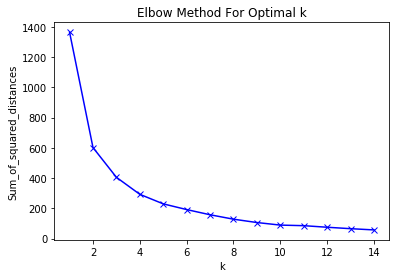

In [96]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
#plt.show()

In [97]:
#In the plot above the elbow is at k=4 indicating the optimal k for this dataset is 4
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       3, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [98]:
kmeans.labels_.shape

(134,)

In [99]:
nyc_interestedfinal.shape

(418, 10)

In [100]:
# add clustering labels
nyc_interested_onehot_grp.insert(0, 'Cluster Labels', kmeans.labels_)

#tvo_merged = comb_df_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
#tvo_merged = tvo_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
nyc_merged=nyc_interested_onehot_grp.join(neighborhoods.set_index('Neighborhood'), on='Neighborhood')
#nyc_interestedfinal.head() # check the last columns!

In [101]:
nyc_interested_onehot_grp

,Cluster Labels,Neighborhood,Department Store,Electronics Store,Indian Restaurant
0,0,Allerton,0,2,0
1,0,Astoria,0,1,2
2,0,Bath Beach,0,1,1
3,0,Battery Park City,1,1,0
4,0,Bay Ridge,0,3,0
5,0,Baychester,0,1,0
6,0,Bayside,0,0,1
7,0,Bedford Park,0,1,0
8,0,Bedford Stuyvesant,0,1,0
9,0,Bellaire,0,0,1


In [102]:
nyc_merged=nyc_interested_onehot_grp.join(neighborhoods.set_index('Neighborhood'), on='Neighborhood')

In [103]:
nyc_merged

,Cluster Labels,Neighborhood,Department Store,Electronics Store,Indian Restaurant,Borough,Latitude,Longitude
0,0,Allerton,0,2,0,Bronx,40.865788,-73.859319
1,0,Astoria,0,1,2,Queens,40.768509,-73.915654
2,0,Bath Beach,0,1,1,Brooklyn,40.599519,-73.998752
3,0,Battery Park City,1,1,0,Manhattan,40.711932,-74.016869
4,0,Bay Ridge,0,3,0,Brooklyn,40.625801,-74.030621
5,0,Baychester,0,1,0,Bronx,40.866858,-73.835798
6,0,Bayside,0,0,1,Queens,40.766041,-73.774274
7,0,Bedford Park,0,1,0,Bronx,40.870185,-73.885512
8,0,Bedford Stuyvesant,0,1,0,Brooklyn,40.687232,-73.941785
9,0,Bellaire,0,0,1,Queens,40.733014,-73.738892


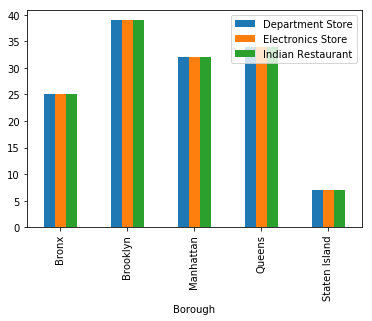

In [122]:

nyc_merged[['Borough','Department Store','Electronics Store','Indian Restaurant']].groupby('Borough').count().plot(kind='bar')


In [123]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [124]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [125]:
nyc_merged.groupby('Borough')['Cluster Labels'].count()

Borough
Bronx            25
Brooklyn         39
Manhattan        32
Queens           34
Staten Island     7
Name: Cluster Labels, dtype: int64

In [130]:
nyc_merged.groupby(['Borough','Cluster Labels']).sum()[['Department Store','Electronics Store','Indian Restaurant']]

Department Store  Electronics Store  \
Borough       Cluster Labels                                        
Bronx         0                              3                 27   
              3                              0                  6   
Brooklyn      0                             11                 40   
              3                              3                 14   
Manhattan     0                             10                 21   
              1                             10                 64   
              2                              0                  5   
              3                             11                 41   
Queens        0                              8                 31   
              1                              0                 11   
Staten Island 0                              1                  7   

                              Indian Restaurant  
Borough       Cluster Labels                     
Bronx         0                               0  
              3                               0  
Brooklyn      0                              19  
              3                               4  
Manhattan     0                              18  
              1                              16  
              2                              20  
              3                              16  
Queens        0                              13  
              1                               2  
Staten Island 0                               1

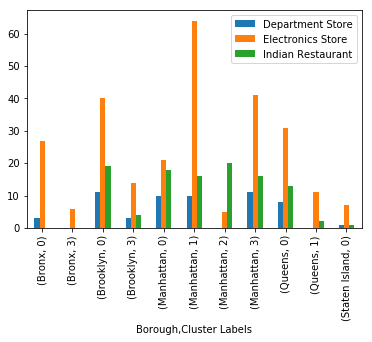

In [131]:
nyc_merged.groupby(['Borough','Cluster Labels']).sum()[['Department Store','Electronics Store','Indian Restaurant']].plot(kind='bar')

#### Let us try something else. I want to cluster by neighbourhoods which have at least one of each venue categories.
#### Remove all rows which have 0 as a value

In [132]:
nyc_interested_onehot_grp.loc[(nyc_interested_onehot_grp['Department Store'] > 0) & (nyc_interested_onehot_grp['Electronics Store'] > 0) &  (nyc_interested_onehot_grp['Indian Restaurant'] > 0)]

,Cluster Labels,Neighborhood,Department Store,Electronics Store,Indian Restaurant
12,0,Boerum Hill,3,2,1
22,3,Chinatown,2,6,1
37,0,East Harlem,1,1,1
44,3,Financial District,1,5,3
46,1,Flatiron,2,10,3
55,3,Greenwich Village,2,8,2
67,0,Kew Gardens,1,1,2
70,3,Lenox Hill,1,5,1
71,3,Little Italy,4,9,2
80,1,Midtown,1,14,5


In [133]:
nyc_merged.loc[(nyc_merged['Department Store'] > 0) & (nyc_merged['Electronics Store'] > 0) &  (nyc_merged['Indian Restaurant'] > 0)]

,Cluster Labels,Neighborhood,Department Store,Electronics Store,Indian Restaurant,Borough,Latitude,Longitude
12,0,Boerum Hill,3,2,1,Brooklyn,40.685683,-73.983748
22,3,Chinatown,2,6,1,Manhattan,40.715618,-73.994279
37,0,East Harlem,1,1,1,Manhattan,40.792249,-73.944182
44,3,Financial District,1,5,3,Manhattan,40.707107,-74.010665
46,1,Flatiron,2,10,3,Manhattan,40.739673,-73.990947
55,3,Greenwich Village,2,8,2,Manhattan,40.726933,-73.999914
67,0,Kew Gardens,1,1,2,Queens,40.705179,-73.829819
70,3,Lenox Hill,1,5,1,Manhattan,40.768113,-73.958860
71,3,Little Italy,4,9,2,Manhattan,40.719324,-73.997305
80,1,Midtown,1,14,5,Manhattan,40.754691,-73.981669


In [138]:
nyc_merged_min1=nyc_merged.loc[(nyc_merged['Department Store'] > 0) & (nyc_merged['Electronics Store'] > 0) &  (nyc_merged['Indian Restaurant'] > 0)]

In [139]:
nyc_merged_min1

,Cluster Labels,Neighborhood,Department Store,Electronics Store,Indian Restaurant,Borough,Latitude,Longitude
12,0,Boerum Hill,3,2,1,Brooklyn,40.685683,-73.983748
22,3,Chinatown,2,6,1,Manhattan,40.715618,-73.994279
37,0,East Harlem,1,1,1,Manhattan,40.792249,-73.944182
44,3,Financial District,1,5,3,Manhattan,40.707107,-74.010665
46,1,Flatiron,2,10,3,Manhattan,40.739673,-73.990947
55,3,Greenwich Village,2,8,2,Manhattan,40.726933,-73.999914
67,0,Kew Gardens,1,1,2,Queens,40.705179,-73.829819
70,3,Lenox Hill,1,5,1,Manhattan,40.768113,-73.958860
71,3,Little Italy,4,9,2,Manhattan,40.719324,-73.997305
80,1,Midtown,1,14,5,Manhattan,40.754691,-73.981669


####  Now let's create the map again and see the cluster map

In [135]:
# create map
map_clusters_min1 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged_min1['Latitude'], nyc_merged_min1['Longitude'], nyc_merged_min1['Neighborhood'], nyc_merged_min1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_min1)
       
map_clusters_min1

In [136]:
nyc_merged_min1.groupby('Borough')['Cluster Labels'].count()

Borough
Brooklyn      1
Manhattan    11
Queens        1
Name: Cluster Labels, dtype: int64

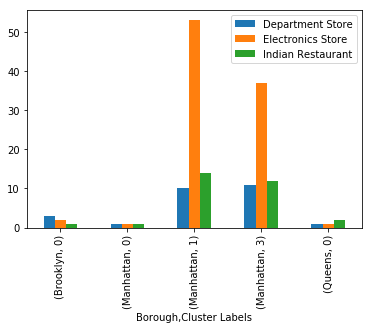

In [142]:
nyc_merged_min1.groupby(['Borough','Cluster Labels']).sum()[['Department Store','Electronics Store','Indian Restaurant']].plot(kind='bar')

#### Looks interesting. My initial hypothesis of using the 3 categories, viz., Indian Restaurant, Department Store and Electronics store does not give much options to choose from. So I may have to try combinations with different categories. That would be my next project :-)

#### Now we will use Bing API to get the best time trave option for each cluster.
http://dev.virtualearth.net/REST/v1/Routes?wayPoint.1={wayPpoint1}&viaWaypoint.2={viaWaypoint2}&waypoint.3={waypoint3}&wayPoint.n={waypointN}&heading={heading}&optimize={optimize}&avoid={avoid}&distanceBeforeFirstTurn={distanceBeforeFirstTurn}&routeAttributes={routeAttributes}&timeType={timeType}&dateTime={dateTime}&maxSolutions={maxSolutions}&tolerances={tolerances}&distanceUnit={distanceUnit}&key={BingMapsKey}

In [143]:
nyc_merged_min1.loc[nyc_merged_min1['Cluster Labels'] == 1]

,Cluster Labels,Neighborhood,Department Store,Electronics Store,Indian Restaurant,Borough,Latitude,Longitude
46,1,Flatiron,2,10,3,Manhattan,40.739673,-73.990947
80,1,Midtown,1,14,5,Manhattan,40.754691,-73.981669
81,1,Midtown South,3,13,4,Manhattan,40.748510,-73.988713
110,1,Soho,4,16,2,Manhattan,40.722184,-74.000657


In [144]:
nyc_merged_min1_cluster1=nyc_merged_min1.loc[nyc_merged_min1['Cluster Labels'] == 1]

In [145]:
nyc_merged_min1_cluster1

,Cluster Labels,Neighborhood,Department Store,Electronics Store,Indian Restaurant,Borough,Latitude,Longitude
46,1,Flatiron,2,10,3,Manhattan,40.739673,-73.990947
80,1,Midtown,1,14,5,Manhattan,40.754691,-73.981669
81,1,Midtown South,3,13,4,Manhattan,40.748510,-73.988713
110,1,Soho,4,16,2,Manhattan,40.722184,-74.000657


In [146]:
nyc_merged_min1.loc[nyc_merged_min1['Cluster Labels'] == 2]

,Cluster Labels,Neighborhood,Department Store,Electronics Store,Indian Restaurant,Borough,Latitude,Longitude


In [147]:
nyc_merged_min1.loc[nyc_merged_min1['Cluster Labels'] == 3]

,Cluster Labels,Neighborhood,Department Store,Electronics Store,Indian Restaurant,Borough,Latitude,Longitude
22,3,Chinatown,2,6,1,Manhattan,40.715618,-73.994279
44,3,Financial District,1,5,3,Manhattan,40.707107,-74.010665
55,3,Greenwich Village,2,8,2,Manhattan,40.726933,-73.999914
70,3,Lenox Hill,1,5,1,Manhattan,40.768113,-73.958860
71,3,Little Italy,4,9,2,Manhattan,40.719324,-73.997305
117,3,Sutton Place,1,4,3,Manhattan,40.760280,-73.963556


In [148]:
# See the data having neighborhood and venue information together.
nyc_interestedfinal

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Category ID id,Venue,Venue Id,Venue Latitude,Venue Longitude,Venue Category
1,Bronx,Eastchester,40.887556,-73.827806,4bf58dd8d48988d122951735,Dyre Wireless Mall,4e6d157db993061ea9221c3f,40.887356,-73.831422,Electronics Store
9,Bronx,Kingsbridge,40.881687,-73.902818,4bf58dd8d48988d1f6941735,Allison's Brand Names For Less,4fe50136e4b08674c9d8fca0,40.878298,-73.904978,Department Store
12,Manhattan,Marble Hill,40.876551,-73.910660,4bf58dd8d48988d1f6941735,T.J. Maxx,546d31ca498e561c698a0320,40.877232,-73.905042,Department Store
14,Manhattan,Marble Hill,40.876551,-73.910660,4bf58dd8d48988d1f6941735,Marshalls,4b3d0fe0f964a520178d25e3,40.873239,-73.908470,Department Store
19,Bronx,Norwood,40.877224,-73.879391,4bf58dd8d48988d122951735,T-Mobile,4d80ca947c956dcb8303e77b,40.873351,-73.877480,Electronics Store
23,Bronx,Williamsbridge,40.881039,-73.857446,4bf58dd8d48988d122951735,innFinn Electronics & Repairs,4e1bf84452b1218fa0189d75,40.880165,-73.860483,Electronics Store
27,Bronx,Baychester,40.866858,-73.835798,4bf58dd8d48988d122951735,PC Richards & Son Bay Plaza mall,53bac91b498efbd69aa1a9cc,40.865798,-73.830554,Electronics Store
31,Bronx,Bedford Park,40.870185,-73.885512,4bf58dd8d48988d122951735,Metro by T-Mobile,5ba641ee872f7d00390192c2,40.869786,-73.890032,Electronics Store
36,Bronx,Morris Heights,40.847898,-73.919672,4bf58dd8d48988d122951735,T-Mobile,58e6e1d0ed0a3257bf429efd,40.850147,-73.916581,Electronics Store
37,Bronx,Morris Heights,40.847898,-73.919672,4bf58dd8d48988d122951735,Metro by T-Mobile,5ba5fe5dfdb9a7002c880ec8,40.850428,-73.916172,Electronics Store


In [149]:
# Get the data in above for matchin neighborhoods for cluster 1
#nyc_interestedfinal[nyc_interestedfinal['Neighborhood'] ==(nyc_merged_min1_cluster1['Neighborhood']) & nyc_interestedfinal['Neighborhood Longitude'] == (nyc_merged_min1_cluster1['Longitude']) & nyc_interestedfinal['Neighborhood Latitude'] ==(nyc_merged_min1_cluster1['Latitude'])]
nyc_cluster1=nyc_interestedfinal.merge(nyc_merged_min1_cluster1,how='inner',  left_on=['Neighborhood','Neighborhood Longitude','Neighborhood Latitude'], right_on = ['Neighborhood','Longitude','Latitude'])

In [150]:
#Let us keep the required columns only
newcols=['Borough_x','Neighborhood','Venue Latitude','Venue Longitude','Venue Category']
nyc_cluster1=nyc_cluster1[newcols]

In [151]:
nyc_cluster1

,Borough_x,Neighborhood,Venue Latitude,Venue Longitude,Venue Category
0,Manhattan,Midtown,40.758199,-73.983938,Indian Restaurant
1,Manhattan,Midtown,40.752470,-73.979198,Electronics Store
2,Manhattan,Midtown,40.757403,-73.981968,Electronics Store
3,Manhattan,Midtown,40.754837,-73.979399,Electronics Store
4,Manhattan,Midtown,40.754532,-73.979682,Electronics Store
5,Manhattan,Midtown,40.755590,-73.985329,Electronics Store
6,Manhattan,Midtown,40.753522,-73.985278,Department Store
7,Manhattan,Midtown,40.752069,-73.979788,Electronics Store
8,Manhattan,Midtown,40.751578,-73.981749,Electronics Store
9,Manhattan,Midtown,40.751597,-73.982341,Electronics Store


In [152]:
#Cluster 1, Neighborhood1
nyc_cluster1_neighborhood=nyc_cluster1['Neighborhood'].unique().tolist()
nyc_cluster1.loc[nyc_cluster1['Neighborhood']==nyc_cluster1_neighborhood[0]]
#.sort_values('Venue Latitude','Venue Longitude')

,Borough_x,Neighborhood,Venue Latitude,Venue Longitude,Venue Category
0,Manhattan,Midtown,40.758199,-73.983938,Indian Restaurant
1,Manhattan,Midtown,40.752470,-73.979198,Electronics Store
2,Manhattan,Midtown,40.757403,-73.981968,Electronics Store
3,Manhattan,Midtown,40.754837,-73.979399,Electronics Store
4,Manhattan,Midtown,40.754532,-73.979682,Electronics Store
5,Manhattan,Midtown,40.755590,-73.985329,Electronics Store
6,Manhattan,Midtown,40.753522,-73.985278,Department Store
7,Manhattan,Midtown,40.752069,-73.979788,Electronics Store
8,Manhattan,Midtown,40.751578,-73.981749,Electronics Store
9,Manhattan,Midtown,40.751597,-73.982341,Electronics Store


In [153]:
nyc_cluster1.loc[nyc_cluster1['Neighborhood']==nyc_cluster1_neighborhood[0]].sort_values(['Venue Latitude','Venue Longitude'])

,Borough_x,Neighborhood,Venue Latitude,Venue Longitude,Venue Category
19,Manhattan,Midtown,40.750395,-73.980071,Electronics Store
8,Manhattan,Midtown,40.751578,-73.981749,Electronics Store
9,Manhattan,Midtown,40.751597,-73.982341,Electronics Store
7,Manhattan,Midtown,40.752069,-73.979788,Electronics Store
16,Manhattan,Midtown,40.752151,-73.986064,Indian Restaurant
15,Manhattan,Midtown,40.752171,-73.986022,Indian Restaurant
1,Manhattan,Midtown,40.752470,-73.979198,Electronics Store
11,Manhattan,Midtown,40.752721,-73.977226,Electronics Store
6,Manhattan,Midtown,40.753522,-73.985278,Department Store
10,Manhattan,Midtown,40.753630,-73.985623,Indian Restaurant


In [154]:
nyc_cluster1_sort=nyc_cluster1.loc[nyc_cluster1['Neighborhood']==nyc_cluster1_neighborhood[0]].sort_values(['Venue Latitude','Venue Longitude'])

In [155]:
nyc_cluster1_dept=nyc_cluster1_sort[nyc_cluster1_sort['Venue Category']=='Department Store']
nyc_cluster1_el=nyc_cluster1_sort[nyc_cluster1_sort['Venue Category']=='Electronics Store']
nyc_cluster1_ind=nyc_cluster1_sort[nyc_cluster1_sort['Venue Category']=='Indian Restaurant']

In [156]:
#Cluster 1 Min distance calculation
##Bings Key
BingMapsKey='AkXHaZnZ9ByXcpQcbYgFV_8LiAHYUwmJZQ0qKSuqxdKd1ga0LFhmxhJTDr-cHrVl'
#http://dev.virtualearth.net/REST/v1/Routes?wayPoint.1={wayPpoint1}&viaWaypoint.2={viaWaypoint2}&waypoint.3={waypoint3}&wayPoint.n={waypointN}&heading={heading}&optimize={optimize}&avoid={avoid}&distanceBeforeFirstTurn={distanceBeforeFirstTurn}&routeAttributes={routeAttributes}&timeType={timeType}&dateTime={dateTime}&maxSolutions={maxSolutions}&tolerances={tolerances}&distanceUnit={distanceUnit}&key={BingMapsKey}
c1_dept_long=0.0
c1_dept_lat=0.0

c1_el_long=0.0
c1_el_lat=0.0

c1_ind_long=0.0
cl_ind_lat=0.0
mindistcol=['c1_dept_lat','c1_dept_long','c1_el_lat','c1_el_long','c1_ind_lat','c1_ind_long','dist']
mindistdf=pd.DataFrame(columns=mindistcol)
#Now we will loop through each combination to find the minimum loop containing one each of Department, Electronics and Indian restaurant
# We will try just one to validate the concept.

for di,dept in nyc_cluster1_dept.iterrows():
    c1_dept_lat=dept['Venue Latitude']
    c1_dept_long=dept['Venue Longitude']
    Waypoint1=[c1_dept_lat,c1_dept_long]
    for ei,el in nyc_cluster1_el.iterrows():
        c1_el_lat=el['Venue Latitude']
        c1_el_long=el['Venue Longitude']
        Waypoint2=[c1_el_lat,c1_el_long]
        for ii,ind in nyc_cluster1_ind.iterrows():
            c1_ind_lat=ind['Venue Latitude']
            c1_ind_long=ind['Venue Longitude']
            Waypoint3=[c1_ind_lat,c1_ind_long]
            #print (type(Waypoint3))
            #print (Waypoint1,viaWaypoint2,viaWaypoint3)
            params = {
                      'wp.0': Waypoint1,
                      'wp.1': Waypoint2,
                      'wp.2': Waypoint3,
                      'optwp': 'true',
                      'optimize': 'timeWithTraffic',
                      'key': 'AkXHaZnZ9ByXcpQcbYgFV_8LiAHYUwmJZQ0qKSuqxdKd1ga0LFhmxhJTDr-cHrVl'
 }
            urln = 'http://dev.virtualearth.net/REST/V1/Routes/Driving?wp.0={Waypoint1}&wp.1={Waypoint2}&wp.2={Waypoint3}&optwp=true&optimize=timeWithTraffic&key=AkXHaZnZ9ByXcpQcbYgFV_8LiAHYUwmJZQ0qKSuqxdKd1ga0LFhmxhJTDr-cHrVl'.format(Waypoint1=",".join(list(map(str,Waypoint1))),Waypoint2=",".join(list(map(str,Waypoint2))),Waypoint3=",".join(list(map(str,Waypoint3))))
            #urln = 'http://dev.virtualearth.net/REST/V1/Routes/Driving?'
            print (urln)
            resultsn = requests.get(urln).json()
            dist=resultsn['resourceSets'][0]['resources'][0]['travelDuration']
            #print (type(mindist))
            mindistdf = mindistdf.append({'c1_dept_lat':c1_dept_lat,'c1_dept_long':c1_dept_long,'c1_el_lat':c1_el_lat,'c1_el_long':c1_el_long,'c1_ind_lat':c1_ind_lat,'c1_ind_long':c1_ind_long,'dist':dist} , ignore_index=True)
 


    

http://dev.virtualearth.net/REST/V1/Routes/Driving?wp.0=40.75352196801364,-73.98527849237782&wp.1=40.750395,-73.980071&wp.2=40.752151,-73.98606419563293&optwp=true&optimize=timeWithTraffic&key=AkXHaZnZ9ByXcpQcbYgFV_8LiAHYUwmJZQ0qKSuqxdKd1ga0LFhmxhJTDr-cHrVl
http://dev.virtualearth.net/REST/V1/Routes/Driving?wp.0=40.75352196801364,-73.98527849237782&wp.1=40.750395,-73.980071&wp.2=40.752170549543244,-73.98602215461085&optwp=true&optimize=timeWithTraffic&key=AkXHaZnZ9ByXcpQcbYgFV_8LiAHYUwmJZQ0qKSuqxdKd1ga0LFhmxhJTDr-cHrVl
http://dev.virtualearth.net/REST/V1/Routes/Driving?wp.0=40.75352196801364,-73.98527849237782&wp.1=40.750395,-73.980071&wp.2=40.75362979952879,-73.98562283674683&optwp=true&optimize=timeWithTraffic&key=AkXHaZnZ9ByXcpQcbYgFV_8LiAHYUwmJZQ0qKSuqxdKd1ga0LFhmxhJTDr-cHrVl
http://dev.virtualearth.net/REST/V1/Routes/Driving?wp.0=40.75352196801364,-73.98527849237782&wp.1=40.750395,-73.980071&wp.2=40.75761646158207,-73.98542196927326&optwp=true&optimize=timeWithTraffic&key=AkXHaZnZ

http://dev.virtualearth.net/REST/V1/Routes/Driving?wp.0=40.75352196801364,-73.98527849237782&wp.1=40.753898935578384,-73.98671436349105&wp.2=40.752151,-73.98606419563293&optwp=true&optimize=timeWithTraffic&key=AkXHaZnZ9ByXcpQcbYgFV_8LiAHYUwmJZQ0qKSuqxdKd1ga0LFhmxhJTDr-cHrVl
http://dev.virtualearth.net/REST/V1/Routes/Driving?wp.0=40.75352196801364,-73.98527849237782&wp.1=40.753898935578384,-73.98671436349105&wp.2=40.752170549543244,-73.98602215461085&optwp=true&optimize=timeWithTraffic&key=AkXHaZnZ9ByXcpQcbYgFV_8LiAHYUwmJZQ0qKSuqxdKd1ga0LFhmxhJTDr-cHrVl
http://dev.virtualearth.net/REST/V1/Routes/Driving?wp.0=40.75352196801364,-73.98527849237782&wp.1=40.753898935578384,-73.98671436349105&wp.2=40.75362979952879,-73.98562283674683&optwp=true&optimize=timeWithTraffic&key=AkXHaZnZ9ByXcpQcbYgFV_8LiAHYUwmJZQ0qKSuqxdKd1ga0LFhmxhJTDr-cHrVl
http://dev.virtualearth.net/REST/V1/Routes/Driving?wp.0=40.75352196801364,-73.98527849237782&wp.1=40.753898935578384,-73.98671436349105&wp.2=40.75761646158207

http://dev.virtualearth.net/REST/V1/Routes/Driving?wp.0=40.75352196801364,-73.98527849237782&wp.1=40.7568603514692,-73.98646647784138&wp.2=40.752151,-73.98606419563293&optwp=true&optimize=timeWithTraffic&key=AkXHaZnZ9ByXcpQcbYgFV_8LiAHYUwmJZQ0qKSuqxdKd1ga0LFhmxhJTDr-cHrVl
http://dev.virtualearth.net/REST/V1/Routes/Driving?wp.0=40.75352196801364,-73.98527849237782&wp.1=40.7568603514692,-73.98646647784138&wp.2=40.752170549543244,-73.98602215461085&optwp=true&optimize=timeWithTraffic&key=AkXHaZnZ9ByXcpQcbYgFV_8LiAHYUwmJZQ0qKSuqxdKd1ga0LFhmxhJTDr-cHrVl
http://dev.virtualearth.net/REST/V1/Routes/Driving?wp.0=40.75352196801364,-73.98527849237782&wp.1=40.7568603514692,-73.98646647784138&wp.2=40.75362979952879,-73.98562283674683&optwp=true&optimize=timeWithTraffic&key=AkXHaZnZ9ByXcpQcbYgFV_8LiAHYUwmJZQ0qKSuqxdKd1ga0LFhmxhJTDr-cHrVl
http://dev.virtualearth.net/REST/V1/Routes/Driving?wp.0=40.75352196801364,-73.98527849237782&wp.1=40.7568603514692,-73.98646647784138&wp.2=40.75761646158207,-73.985

In [157]:
urln


'http://dev.virtualearth.net/REST/V1/Routes/Driving?wp.0=40.75352196801364,-73.98527849237782&wp.1=40.75740279911184,-73.98196779191494&wp.2=40.758199046480186,-73.98393847194978&optwp=true&optimize=timeWithTraffic&key=AkXHaZnZ9ByXcpQcbYgFV_8LiAHYUwmJZQ0qKSuqxdKd1ga0LFhmxhJTDr-cHrVl'

In [158]:
resultsn['resourceSets'][0]['resources'][0]['travelDuration']

303

In [159]:
#Let's check the distance results. Distances are in seconds
mindistdf

,c1_dept_lat,c1_dept_long,c1_el_lat,c1_el_long,c1_ind_lat,c1_ind_long,dist
0,40.753522,-73.985278,40.750395,-73.980071,40.752151,-73.986064,219.0
1,40.753522,-73.985278,40.750395,-73.980071,40.752171,-73.986022,219.0
2,40.753522,-73.985278,40.750395,-73.980071,40.753630,-73.985623,269.0
3,40.753522,-73.985278,40.750395,-73.980071,40.757616,-73.985422,310.0
4,40.753522,-73.985278,40.750395,-73.980071,40.758199,-73.983938,416.0
5,40.753522,-73.985278,40.751578,-73.981749,40.752151,-73.986064,193.0
6,40.753522,-73.985278,40.751578,-73.981749,40.752171,-73.986022,193.0
7,40.753522,-73.985278,40.751578,-73.981749,40.753630,-73.985623,243.0
8,40.753522,-73.985278,40.751578,-73.981749,40.757616,-73.985422,269.0
9,40.753522,-73.985278,40.751578,-73.981749,40.758199,-73.983938,375.0


In [160]:
#Sorted values and get the minimun
mindistdf.sort_values('dist').head(1)

,c1_dept_lat,c1_dept_long,c1_el_lat,c1_el_long,c1_ind_lat,c1_ind_long,dist
47,40.753522,-73.985278,40.75511,-73.98623,40.75363,-73.985623,71.0


In [161]:
cluster1_min=mindistdf.sort_values('dist').head(1)
cluster1_min


,c1_dept_lat,c1_dept_long,c1_el_lat,c1_el_long,c1_ind_lat,c1_ind_long,dist
47,40.753522,-73.985278,40.75511,-73.98623,40.75363,-73.985623,71.0


In [182]:
cluster1_min['c1_el_lat'].values[0]

40.75511

In [185]:
l1=cluster1_min['c1_dept_lat'].values[0]
l2=cluster1_min['c1_dept_long'].values[0]
print (l1,l2)
locationlist_c1_n1=[[cluster1_min['c1_dept_lat'].values[0],cluster1_min['c1_dept_long'].values[0]]]
locationlist_c1_n1.append([[cluster1_min['c1_el_lat'].values[0],cluster1_min['c1_el_long'].values[0]]])
locationlist_c1_n1.append([[cluster1_min['c1_ind_lat'].values[0],cluster1_min['c1_ind_long'].values[0]]])
locationlist_c1_n1[0]
print(len(locationlist_c1_n1))


40.75352196801364 -73.98527849237782
3


In [186]:
# MAp it using Folium
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

# create map

map_clustersc1_n1 = folium.Map(location=[latitude, longitude], zoom_start=11)

for point in range(0, len(locationlist_c1_n1)):
    print (locationlist_c1_n1[point])
    #add markers
    folium.Marker(locationlist_c1_n1[point]).add_to(map_clustersc1_n1)
 
#add lines
folium.PolyLine(locationlist_c1_n1, color="red", weight=2.5, opacity=1).add_to(map_clustersc1_n1)
    #folium.Marker(locationlist_c1_n1[point], popup=df_counters['Name'][point]).add_to(map_clustersc1_n1)

map_clustersc1_n1


The geograpical coordinate of New York City are 40.7127281, -74.0060152.
[40.75352196801364, -73.98527849237782]
[[40.75511, -73.98623]]
[[40.75362979952879, -73.98562283674683]]


#### Locations are too close to be legibly visible on map.  

#### Discussion
So what all we did. We hypothesized that I can combine NYC data set with Foursquare and Bing API to create a tour covering different similar sections of NYC using 3 categories. Department Store, Electronics Store and Indian Restaurant.
The first two category selections were based on the Tourist information wherein it stated that Tourists top destination are Department and electronics Store.
The third one, well they got to it eat somewhere.

We used Foursquare API to get venues for those categories and tried to get ratings and likes. Unfortunately, the rating and like information does not exist for all venues and hence cannot be used.
For now I have mocked the data but we have to think how to do it. either we can use some other API like google or facebook or Yelp or aks for interests and based on interests from user and create the database.
Anyway the conceot can be used as we got interseting clusters of NYC.

We then used Bing API to get the optimized distance for each neighborhood of each cluster. We only did for one of them but it can be repeated for others.

We got interesting and postive results back.

Google API now charges so we have to use alternative options, folium is good option to draw the locations and path.
overall I am satistified that we are on right track and the concept is feasiblt to be built into out touris website.

#### Results & Conclusion
My hypothesis that I can use NYC data, Foursquare API and Bing API for a Virtual tour is correct. NYC itself has a potential for multiple tour locations. I can use similar method ofr other cities. This will value add to my Travel website.
But I need to add more Venue categories. I also need to add Hotel location. I can also use the above clustering and distance optimization technique to make it interactive with the user.

#### References
https://www.google.com/search?client=firefox-b-1-d&q=New+York+City#

https://nycfuture.org/research/destination-new-york


#### Acknowledgement
I am thankful to IBM for this awesome course, it has been a great experience. I also thank to the members of the discussion group and IBM Watson support group.
And and in the last, towardsdatascience online blog and stackexchange to help me whenever I got stuck.